# Figure Rendering - PIBIC Partial Report

### Importing the Required Packages

In [1]:
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import generators
import utils
import torch

device = 'cpu'

In [2]:
z_dim = 64 
mnist_classes, fashion_mnist_classes = 10, 10
emnist_letters_classes, celeba_classes = 27, 3
gray_shape, color_shape = (1, 28, 28), (3, 64, 64)

### Simple GAN

In [ ]:
z_dim = 64 
gray_shape, color_shape = (1, 28, 28), (3, 64, 64)
simple_gan_mnist = generators.GeneratorSimpleGAN(z_dim = z_dim)
simple_gan_fashion_mnist = generators.GeneratorSimpleGAN(z_dim = z_dim)
simple_gan_emnist_letters = generators.GeneratorSimpleGAN(z_dim = z_dim)

model_path1 = '../implemented-gans-architectures/simple-gan/mnist/saved-models/gen_conditional_simple_gan_mnist.pth'
model_path2 = '../implemented-gans-architectures/simple-gan/fashion-mnist/saved-models/gen_conditional_simple_gan_fashion_mnist.pth'
model_path3 = '../implemented-gans-architectures/simple-gan/emnist-letters/saved-models/gen_conditional_simple_gan_emnist_letters.pth'

simple_gan_mnist.load_state_dict(torch.load(model_path1, map_location = torch.device(device)))
simple_gan_mnist.eval()
simple_gan_fashion_mnist.load_state_dict(torch.load(model_path2, map_location = torch.device(device)))
simple_gan_fashion_mnist.eval()
simple_gan_emnist_letters.load_state_dict(torch.load(model_path3, map_location = torch.device(device)))
simple_gan_emnist_letters.eval()

In [173]:
images_arrays_mnist = np.zeros(shape = (9, 28, 28))
images_arrays_fashion_mnist = np.zeros(shape = (9, 28, 28))
images_arrays_emnist_letters = np.zeros(shape = (9, 28, 28))

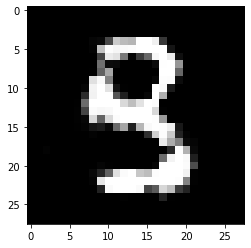

In [463]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
fake = simple_gan_mnist(noise)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_mnist[8] = fake[0, 0]

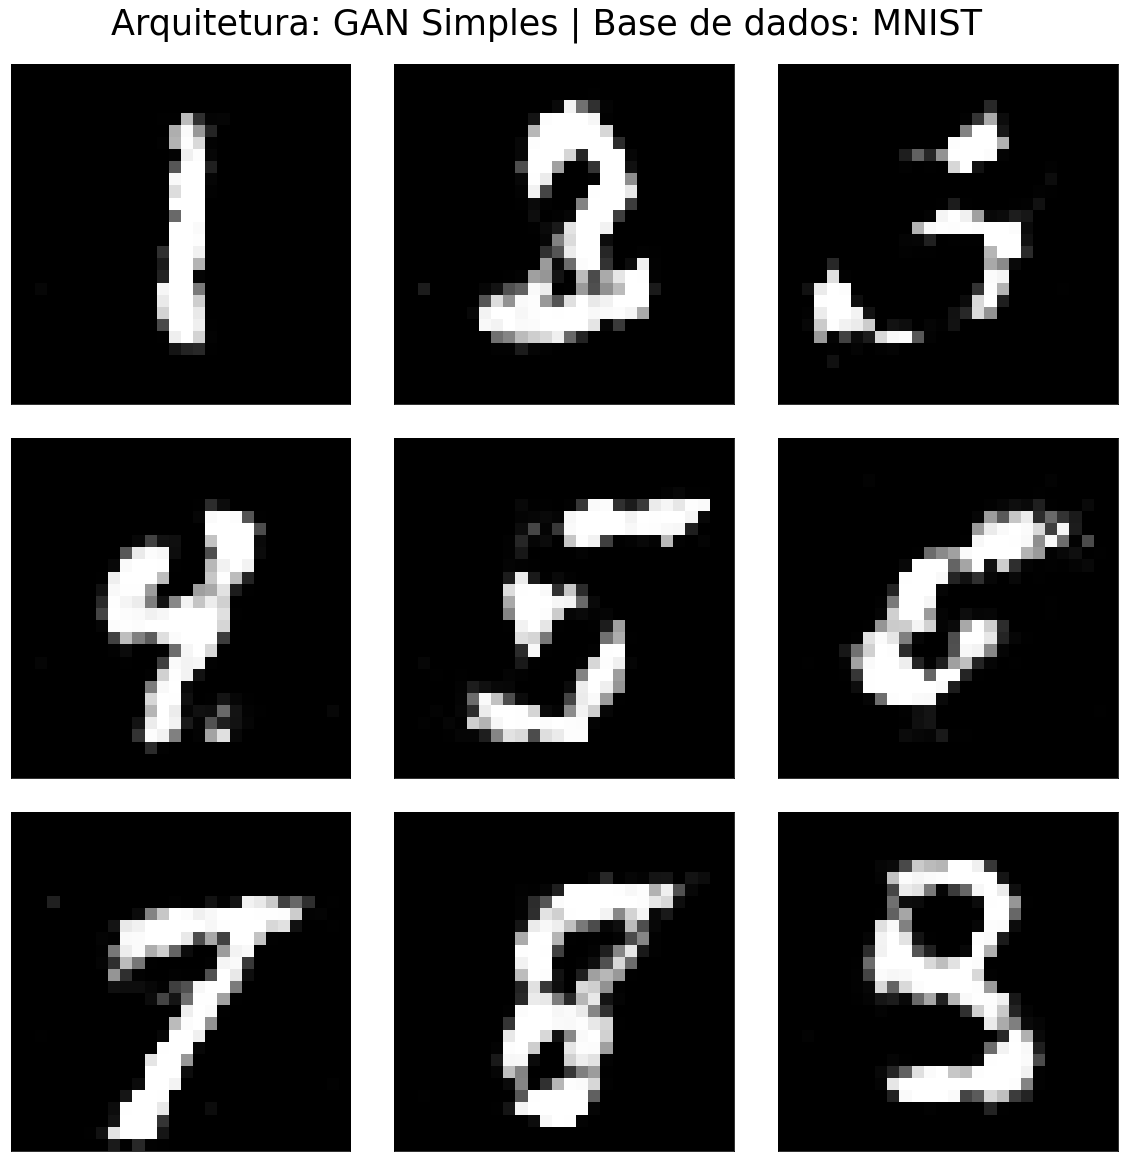

In [466]:
utils.grid_images(image_array = images_arrays_mnist, cmap = 'gray', 
                  suptitle = 'Arquitetura: GAN Simples | Base de dados: MNIST',
                  name_fig = 'simple_gan_mnist')

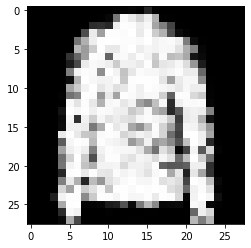

In [545]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
fake = simple_gan_fashion_mnist(noise)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_fashion_mnist[8] = fake[0, 0]

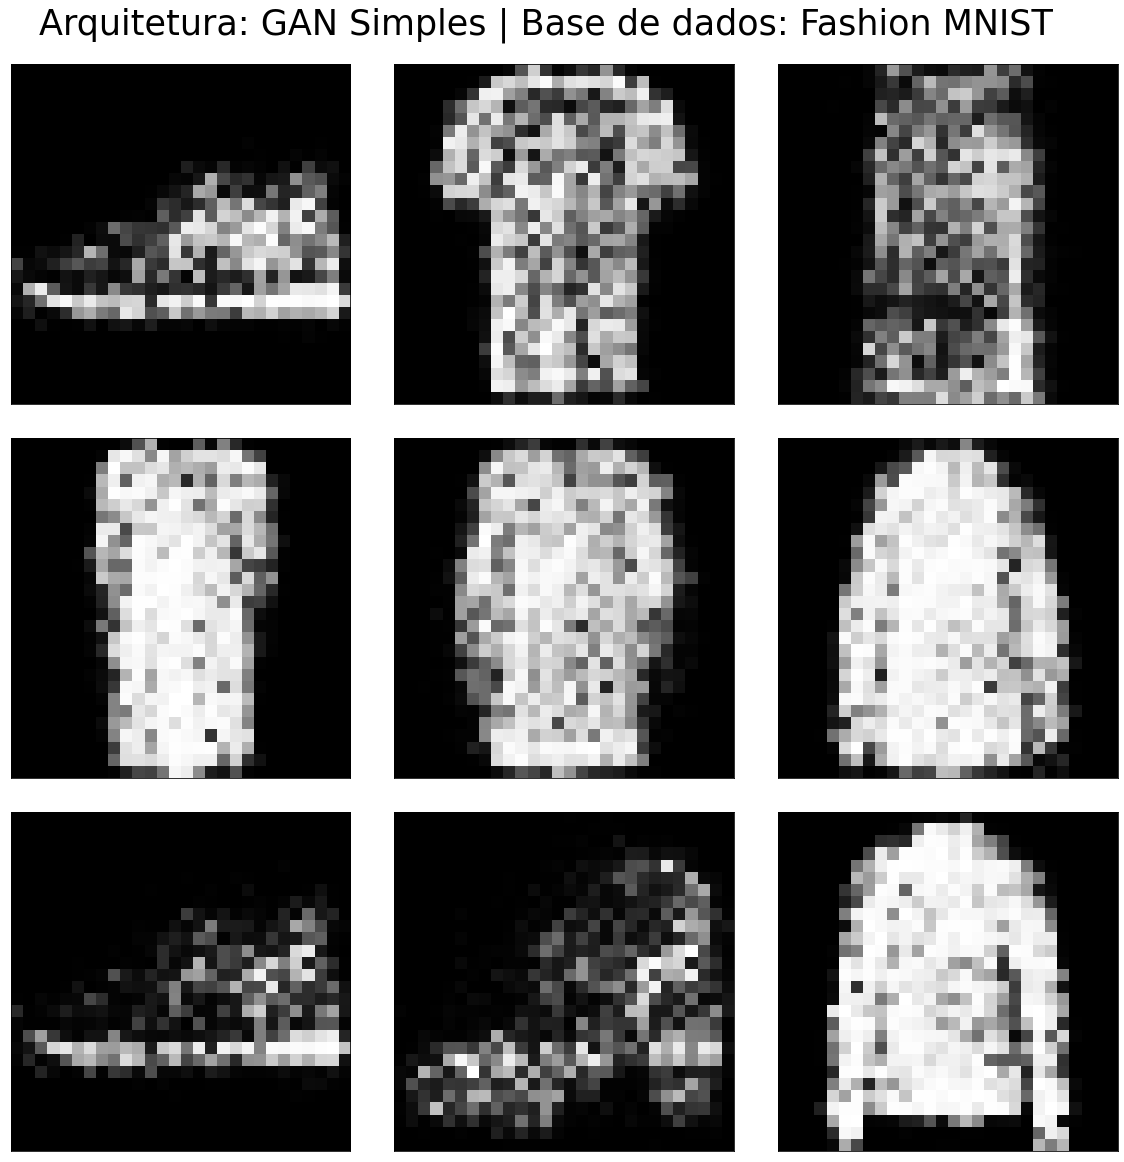

In [546]:
utils.grid_images(image_array = images_arrays_fashion_mnist, cmap = 'gray', 
                  suptitle = 'Arquitetura: GAN Simples | Base de dados: Fashion MNIST',
                  name_fig = 'simple_gan_fashion_mnist')

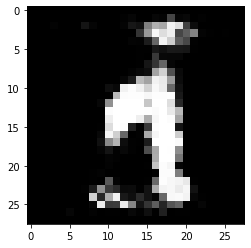

In [887]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
fake = simple_gan_emnist_letters(noise)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_emnist_letters[8] = fake[0, 0]

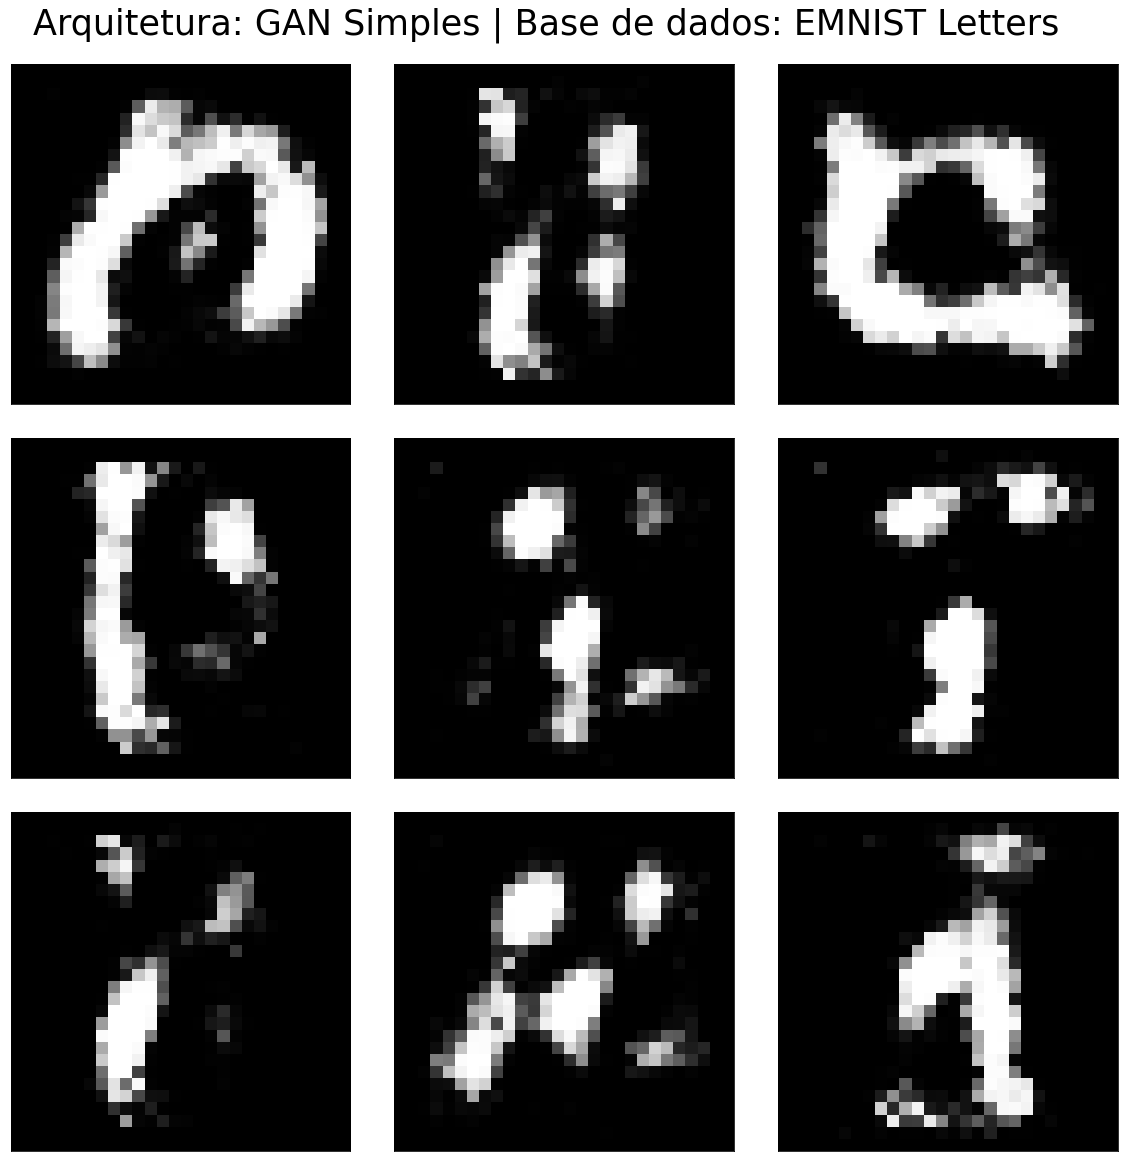

In [888]:
utils.grid_images(image_array = images_arrays_emnist_letters, cmap = 'gray', 
                  suptitle = 'Arquitetura: GAN Simples | Base de dados: EMNIST Letters',
                  name_fig = 'simple_gan_emnist_letters')

### DCGAN

In [ ]:
gray_shape, color_shape = (1, 28, 28), (3, 64, 64)
generator_input_dim1 = utils.get_input_dimensions(z_dim, mnist_classes)
dcgan_mnist = generators.GeneratorDCGAN_V1_0(input_dim = generator_input_dim1)
generator_input_dim2 = utils.get_input_dimensions(z_dim, fashion_mnist_classes)
dcgan_fashion_mnist = generators.GeneratorDCGAN_V1_0(input_dim = generator_input_dim2)
generator_input_dim3 = utils.get_input_dimensions(z_dim, emnist_letters_classes)
dcgan_emnist_letters = generators.GeneratorDCGAN_V1_0(input_dim = generator_input_dim3)
generator_input_dim4 = utils.get_input_dimensions(z_dim, celeba_classes)
dcgan_celeba = generators.GeneratorDCGAN_V2_0(input_dim = generator_input_dim4)

model_path1 = '../implemented-gans-architectures/dcgan/mnist/saved-models/gen_conditional_dcgan_mnist.pth'
model_path2 = '../implemented-gans-architectures/dcgan/fashion-mnist/saved-models/gen_conditional_dcgan_fashion_mnist.pth'
model_path3 = '../implemented-gans-architectures/dcgan/emnist-letters/saved-models/gen_conditional_dcgan_emnist_letters.pth'
model_path4 = '../implemented-gans-architectures/dcgan/celeba/saved-models/gen_conditional_dcgan_celeba.pth'

dcgan_mnist.load_state_dict(torch.load(model_path1, map_location = torch.device(device)))
dcgan_mnist.eval()
dcgan_fashion_mnist.load_state_dict(torch.load(model_path2, map_location = torch.device(device)))
dcgan_fashion_mnist.eval()
dcgan_emnist_letters.load_state_dict(torch.load(model_path3, map_location = torch.device(device)))
dcgan_emnist_letters.eval()
dcgan_celeba.load_state_dict(torch.load(model_path4, map_location = torch.device(device)))
dcgan_celeba.eval()

In [113]:
images_arrays_mnist = np.zeros(shape = (9, 28, 28))
images_arrays_fashion_mnist = np.zeros(shape = (9, 28, 28))
images_arrays_emnist_letters = np.zeros(shape = (9, 28, 28))
images_arrays_celeba = np.zeros(shape = (9, 64, 64, 3))

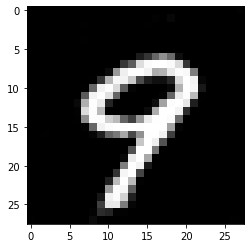

In [35]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([1]), mnist_classes).float()), 
                                         dim = 1)
fake = dcgan_mnist(noise_conditional)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_mnist[8] = fake[0, 0]

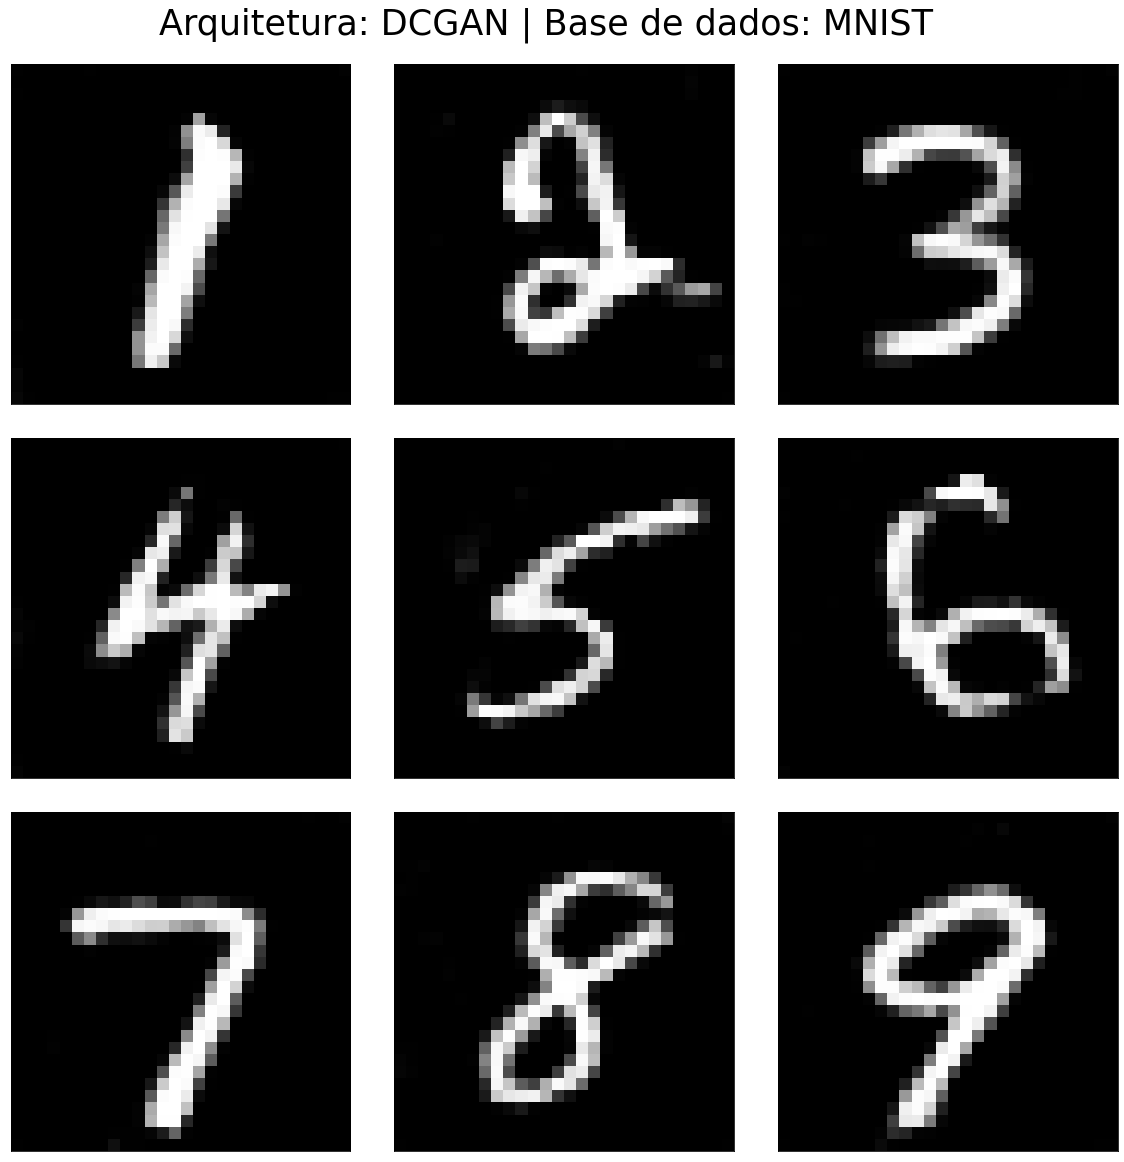

In [73]:
utils.grid_images(image_array = images_arrays_mnist, cmap = 'gray', 
                  suptitle = 'Arquitetura: DCGAN | Base de dados: MNIST',
                  name_fig = 'dcgan_mnist')

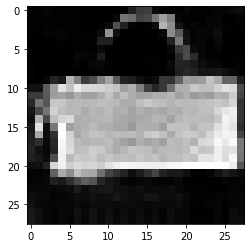

In [70]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([8]), fashion_mnist_classes).float()), 
                                         dim = 1)
fake = dcgan_fashion_mnist(noise_conditional)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_fashion_mnist[8] = fake[0, 0]

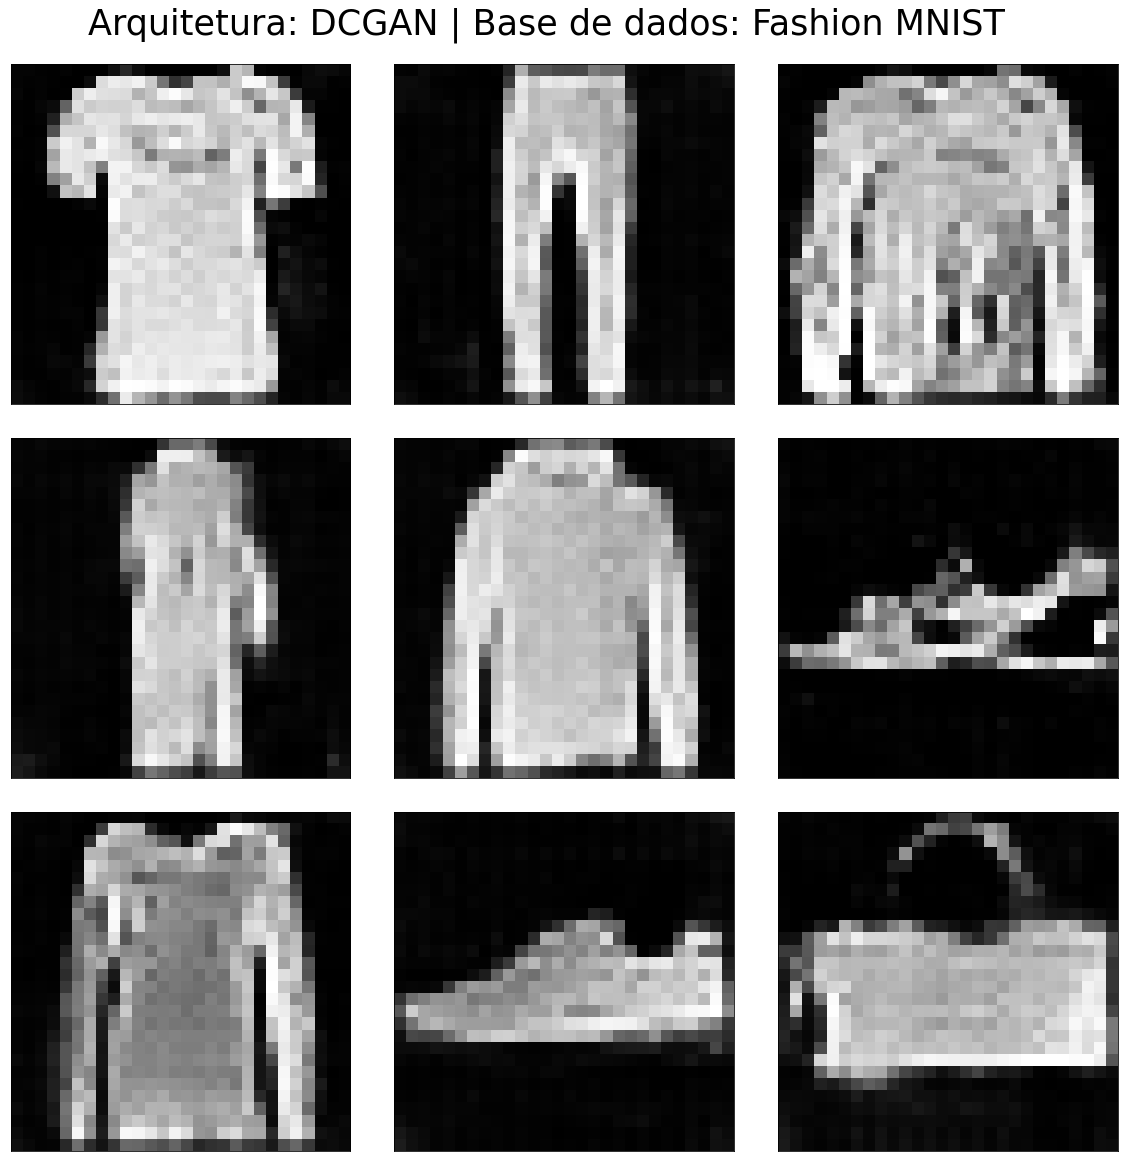

In [72]:
utils.grid_images(image_array = images_arrays_fashion_mnist, cmap = 'gray', 
                  suptitle = 'Arquitetura: DCGAN | Base de dados: Fashion MNIST',
                  name_fig = 'dcgan_fashion_mnist')

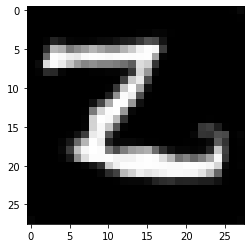

In [94]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([26]), emnist_letters_classes).float()), 
                                         dim = 1)
fake = dcgan_emnist_letters(noise_conditional)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_emnist_letters[8] = fake[0, 0]

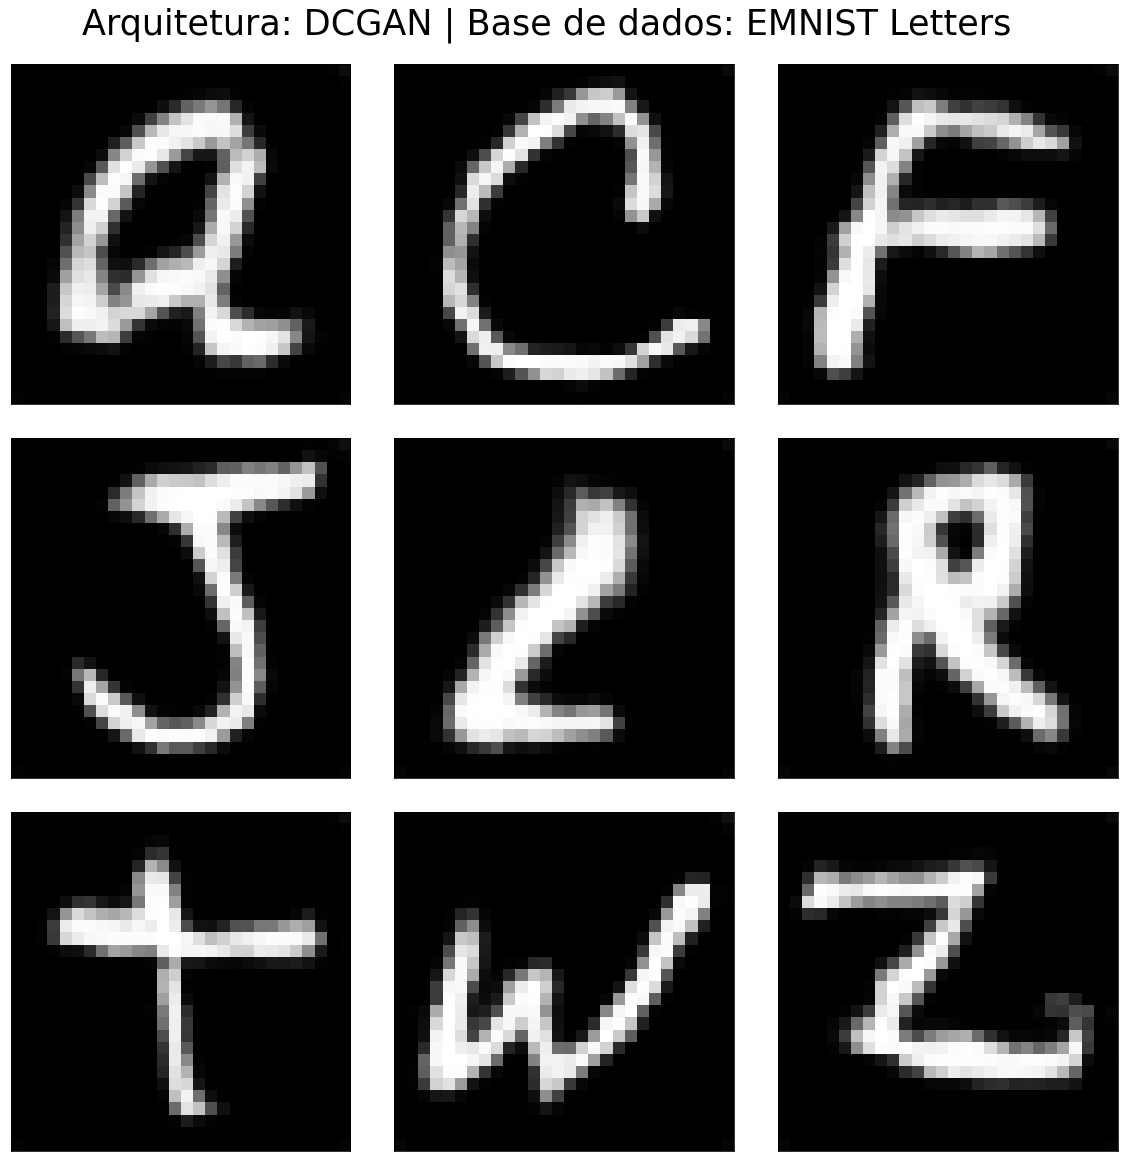

In [96]:
utils.grid_images(image_array = images_arrays_emnist_letters, cmap = 'gray', 
                  suptitle = 'Arquitetura: DCGAN | Base de dados: EMNIST Letters',
                  name_fig = 'dcgan_emnist_letters')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


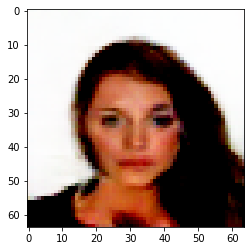

In [129]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([1]), celeba_classes).float()), 
                                         dim = 1)
fake = dcgan_celeba(noise_conditional)
fake = fake.detach().cpu().view(-1, *color_shape)
plt.imshow(fake[0].permute(1, 2, 0))
images_arrays_celeba[8] = fake[0].permute(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


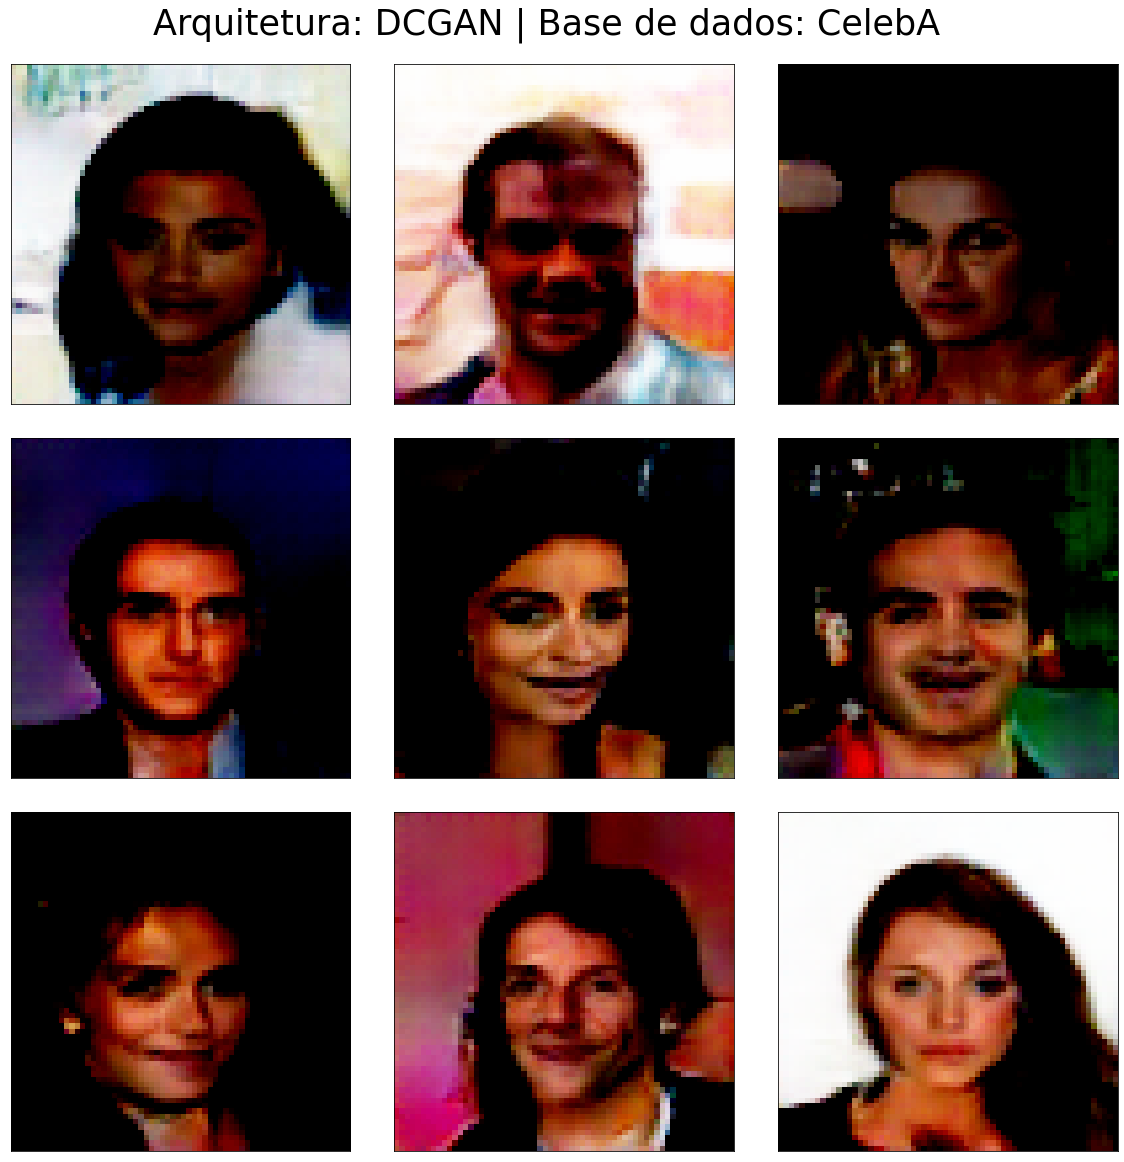

In [130]:
utils.grid_images(image_array = images_arrays_celeba, cmap = None, 
                  suptitle = 'Arquitetura: DCGAN | Base de dados: CelebA',
                  name_fig = 'dcgan_celeba')

### SNGAN

In [ ]:
generator_input_dim1 = utils.get_input_dimensions(z_dim, mnist_classes)
sngan_mnist = generators.GeneratorSNGAN_V1_0(input_dim = generator_input_dim1)
generator_input_dim2 = utils.get_input_dimensions(z_dim, fashion_mnist_classes)
sngan_fashion_mnist = generators.GeneratorSNGAN_V1_0(input_dim = generator_input_dim2)
generator_input_dim3 = utils.get_input_dimensions(z_dim, emnist_letters_classes)
sngan_emnist_letters = generators.GeneratorSNGAN_V1_0(input_dim = generator_input_dim3)
generator_input_dim4 = utils.get_input_dimensions(z_dim, celeba_classes)
sngan_celeba = generators.GeneratorSNGAN_V2_0(input_dim = generator_input_dim4)

model_path1 = '../implemented-gans-architectures/sngan/mnist/saved-models/gen_conditional_sngan_mnist.pth'
model_path2 = '../implemented-gans-architectures/sngan/fashion-mnist/saved-models/gen_conditional_sngan_fashion_mnist.pth'
model_path3 = '../implemented-gans-architectures/sngan/emnist-letters/saved-models/gen_conditional_sngan_emnist_letters.pth'
model_path4 = '../implemented-gans-architectures/sngan/celeba/saved-models/gen_conditional_sngan_celeba.pth'

sngan_mnist.load_state_dict(torch.load(model_path1, map_location = torch.device(device)))
sngan_mnist.eval()
sngan_fashion_mnist.load_state_dict(torch.load(model_path2, map_location = torch.device(device)))
sngan_fashion_mnist.eval()
sngan_emnist_letters.load_state_dict(torch.load(model_path3, map_location = torch.device(device)))
sngan_emnist_letters.eval()
sngan_celeba.load_state_dict(torch.load(model_path4, map_location = torch.device(device)))
sngan_celeba.eval()

In [132]:
images_arrays_mnist = np.zeros(shape = (9, 28, 28))
images_arrays_fashion_mnist = np.zeros(shape = (9, 28, 28))
images_arrays_emnist_letters = np.zeros(shape = (9, 28, 28))
images_arrays_celeba = np.zeros(shape = (9, 64, 64, 3))

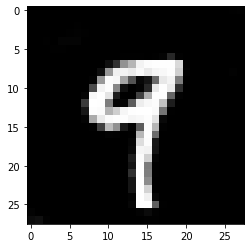

In [183]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([9]), mnist_classes).float()), 
                                         dim = 1)
fake = sngan_mnist(noise_conditional)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_mnist[8] = fake[0, 0]

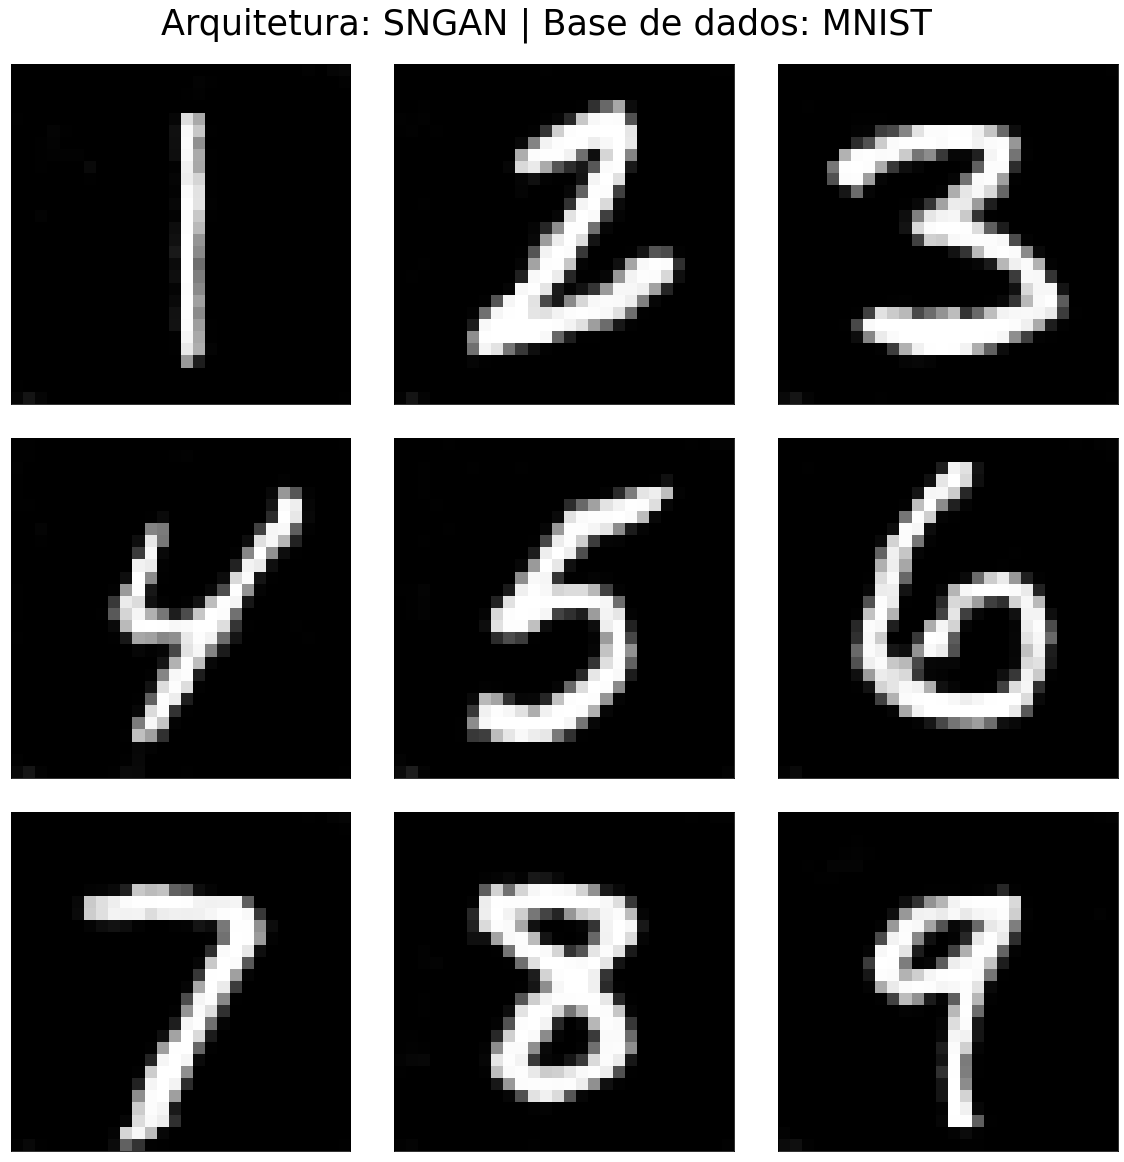

In [184]:
utils.grid_images(image_array = images_arrays_mnist, cmap = 'gray', 
                  suptitle = 'Arquitetura: SNGAN | Base de dados: MNIST',
                  name_fig = 'sngan_mnist')

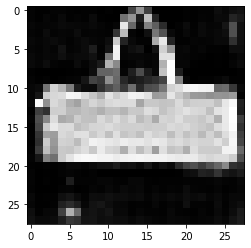

In [265]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([8]), fashion_mnist_classes).float()), 
                                         dim = 1)
fake = sngan_fashion_mnist(noise_conditional)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_fashion_mnist[8] = fake[0, 0]

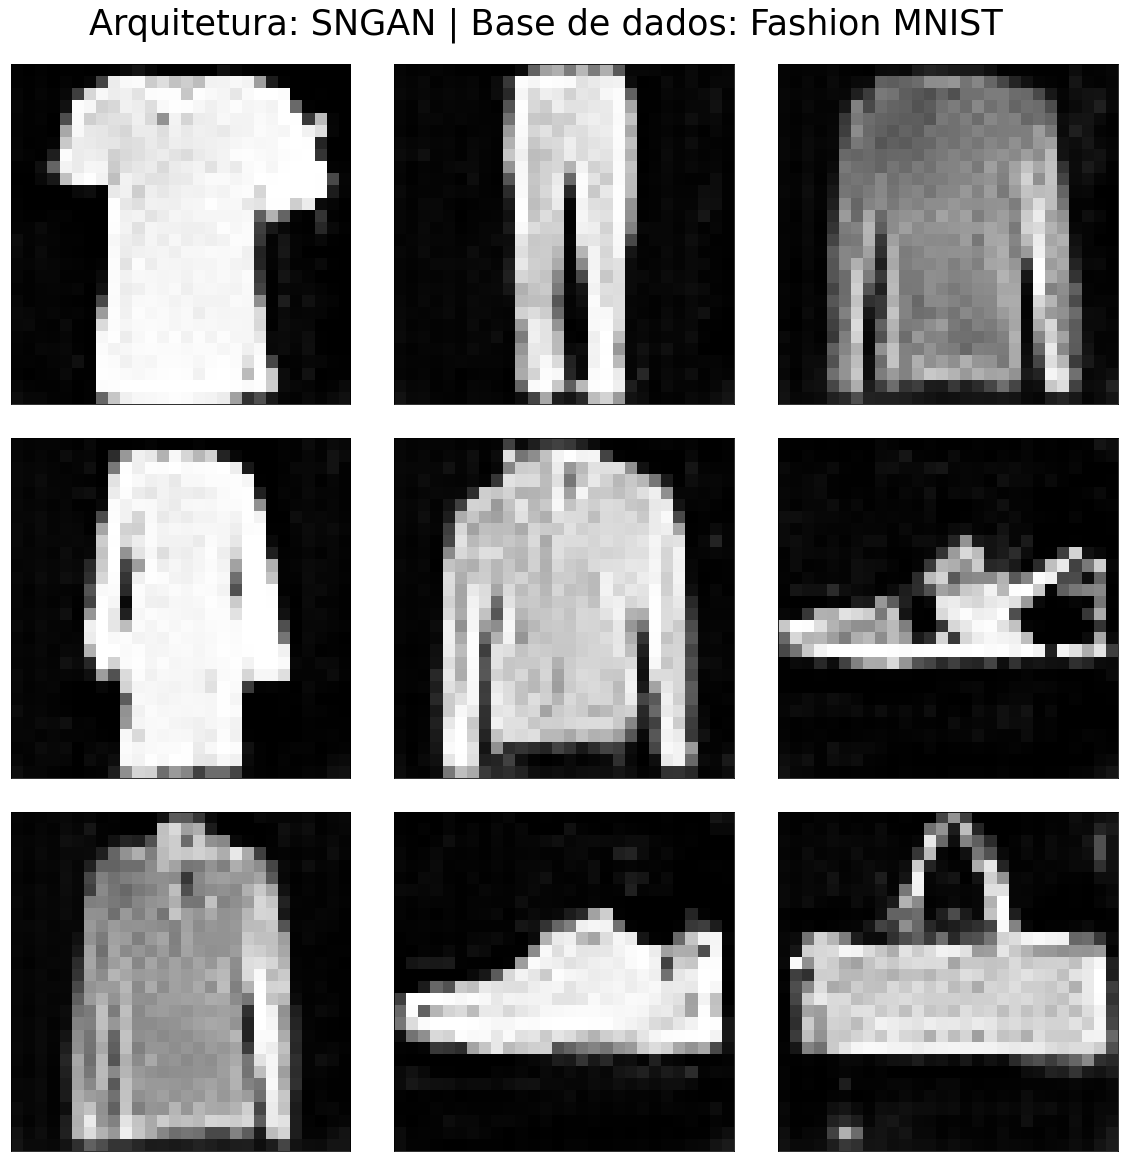

In [266]:
utils.grid_images(image_array = images_arrays_fashion_mnist, cmap = 'gray', 
                  suptitle = 'Arquitetura: SNGAN | Base de dados: Fashion MNIST',
                  name_fig = 'sngan_fashion_mnist')

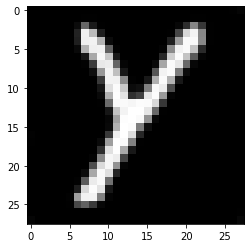

In [333]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([25]), emnist_letters_classes).float()), 
                                         dim = 1)
fake = sngan_emnist_letters(noise_conditional)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_emnist_letters[8] = fake[0, 0]

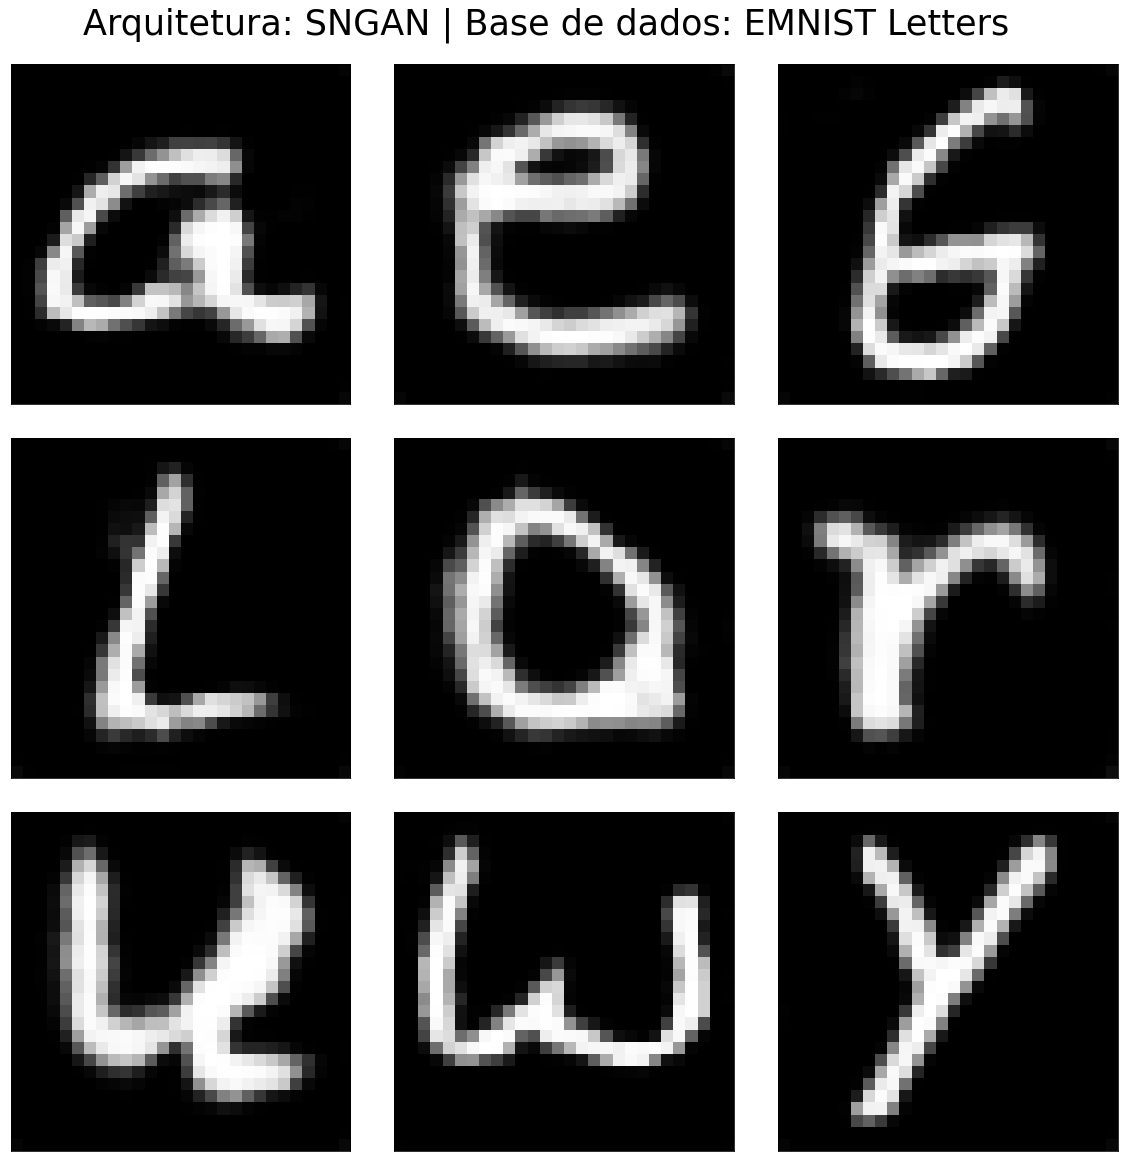

In [334]:
utils.grid_images(image_array = images_arrays_emnist_letters, cmap = 'gray', 
                  suptitle = 'Arquitetura: SNGAN | Base de dados: EMNIST Letters',
                  name_fig = 'sngan_emnist_letters')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


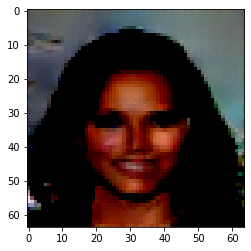

In [395]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([1]), celeba_classes).float()), 
                                         dim = 1)
fake = sngan_celeba(noise_conditional)
fake = fake.detach().cpu().view(-1, *color_shape)
plt.imshow(fake[0].permute(1, 2, 0))
images_arrays_celeba[8] = fake[0].permute(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


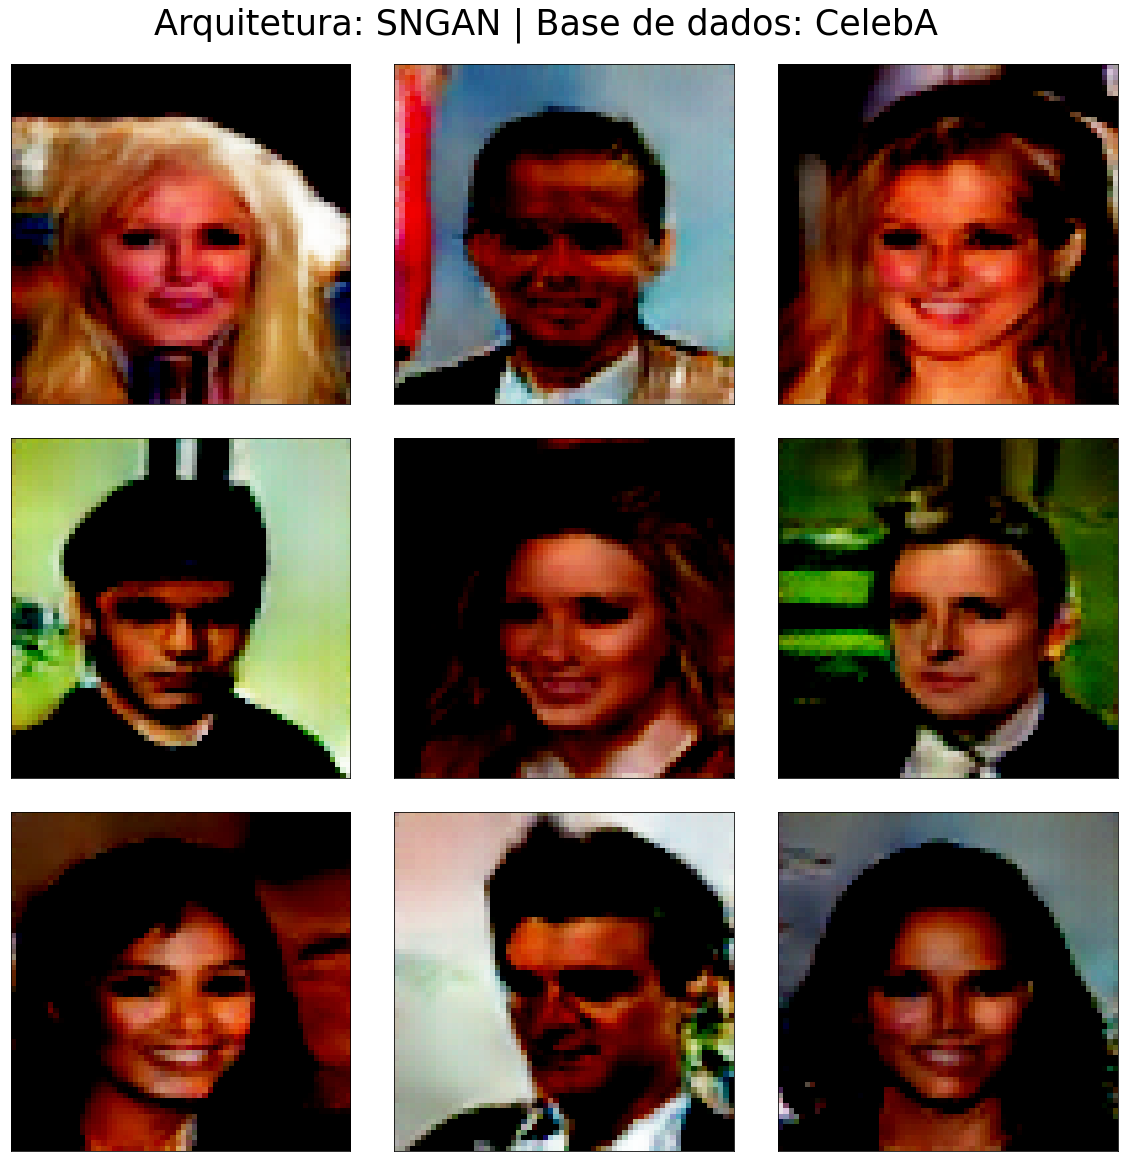

In [396]:
utils.grid_images(image_array = images_arrays_celeba, cmap = None, 
                  suptitle = 'Arquitetura: SNGAN | Base de dados: CelebA',
                  name_fig = 'sngan_celeba')

### WGAN-GP

In [ ]:
generator_input_dim1 = utils.get_input_dimensions(z_dim, mnist_classes)
wgan_gp_mnist = generators.GeneratorWGANGP_V1_0(z_dim = generator_input_dim1)
generator_input_dim2 = utils.get_input_dimensions(z_dim, fashion_mnist_classes)
wgan_gp_fashion_mnist = generators.GeneratorWGANGP_V1_0(z_dim = generator_input_dim2)
generator_input_dim3 = utils.get_input_dimensions(z_dim, emnist_letters_classes)
wgan_gp_emnist_letters = generators.GeneratorWGANGP_V1_0(z_dim = generator_input_dim3)
generator_input_dim4 = utils.get_input_dimensions(z_dim, celeba_classes)
wgan_gp_celeba = generators.GeneratorWGANGP_V2_0(input_dim = generator_input_dim4)

model_path1 = '../implemented-gans-architectures/wgan-gp/mnist/saved-models/gen_conditional_wgangp_mnist.pth'
model_path2 = '../implemented-gans-architectures/wgan-gp/fashion-mnist/saved-models/gen_conditional_wgan_gp_fashion_mnist.pth'
model_path3 = '../implemented-gans-architectures/wgan-gp/emnist-letters/saved-models\gen_conditional_wgan_gp_emnist_letters.pth'
model_path4 = '../implemented-gans-architectures/wgan-gp/celeba/saved-models/gen_conditional_wgan_gp_celeba.pth'

wgan_gp_mnist.load_state_dict(torch.load(model_path1, map_location = torch.device(device)))
wgan_gp_mnist.eval()
wgan_gp_fashion_mnist.load_state_dict(torch.load(model_path2, map_location = torch.device(device)))
wgan_gp_fashion_mnist.eval()
wgan_gp_emnist_letters.load_state_dict(torch.load(model_path3, map_location = torch.device(device)))
wgan_gp_emnist_letters.eval()
wgan_gp_celeba.load_state_dict(torch.load(model_path4, map_location = torch.device(device)))
wgan_gp_celeba.eval()

In [5]:
images_arrays_mnist = np.zeros(shape = (9, 28, 28))
images_arrays_fashion_mnist = np.zeros(shape = (9, 28, 28))
images_arrays_emnist_letters = np.zeros(shape = (9, 28, 28))
images_arrays_celeba = np.zeros(shape = (9, 64, 64, 3))

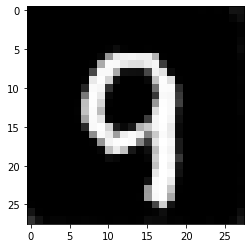

In [93]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([9]), mnist_classes).float()), 
                                         dim = 1)
fake = wgan_gp_mnist(noise_conditional)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_mnist[8] = fake[0, 0]

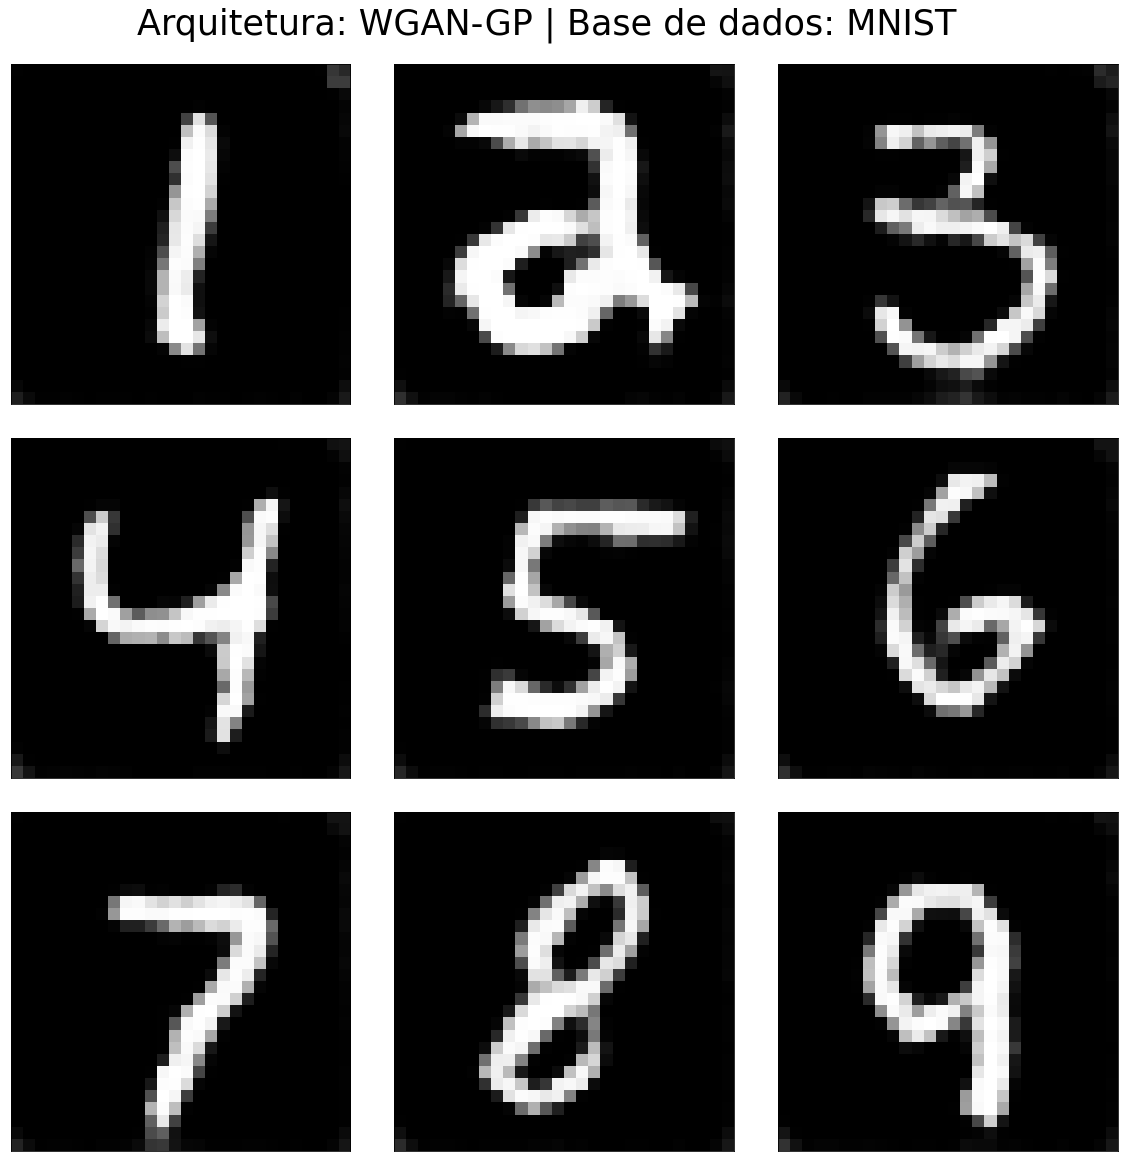

In [94]:
utils.grid_images(image_array = images_arrays_mnist, cmap = 'gray', 
                  suptitle = 'Arquitetura: WGAN-GP | Base de dados: MNIST',
                  name_fig = 'wgan_gp_mnist')

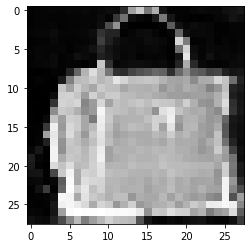

In [140]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([8]), fashion_mnist_classes).float()), 
                                         dim = 1)
fake = wgan_gp_fashion_mnist(noise_conditional)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_fashion_mnist[8] = fake[0, 0]

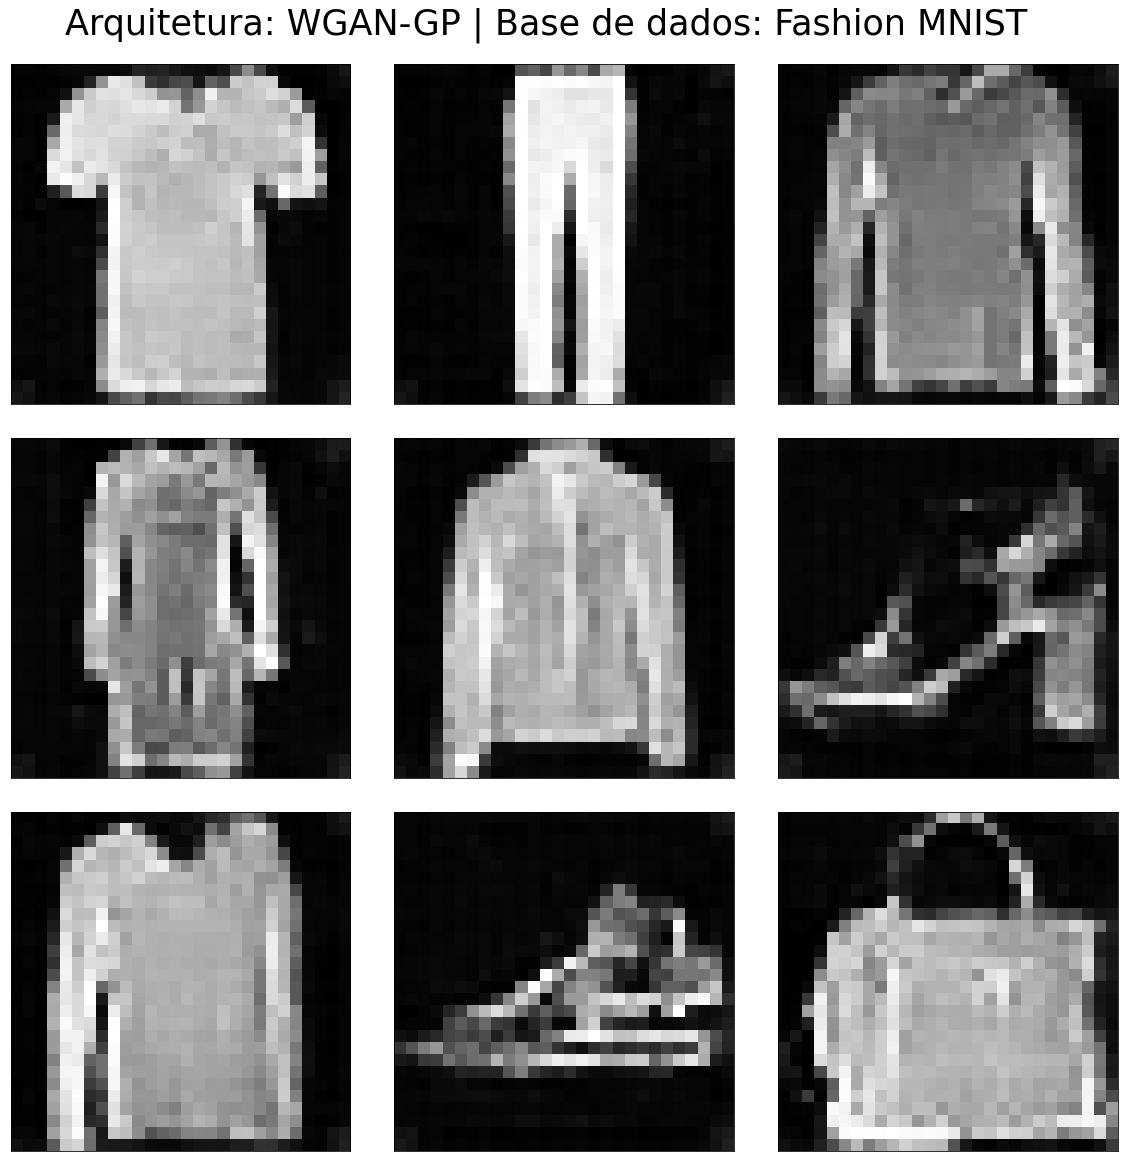

In [141]:
utils.grid_images(image_array = images_arrays_fashion_mnist, cmap = 'gray', 
                  suptitle = 'Arquitetura: WGAN-GP | Base de dados: Fashion MNIST',
                  name_fig = 'wgan_gp_fashion_mnist')

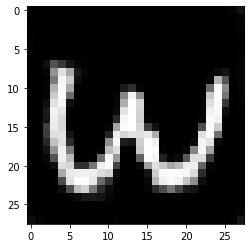

In [219]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([23]), emnist_letters_classes).float()), 
                                         dim = 1)
fake = wgan_gp_emnist_letters(noise_conditional)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_emnist_letters[8] = fake[0, 0]

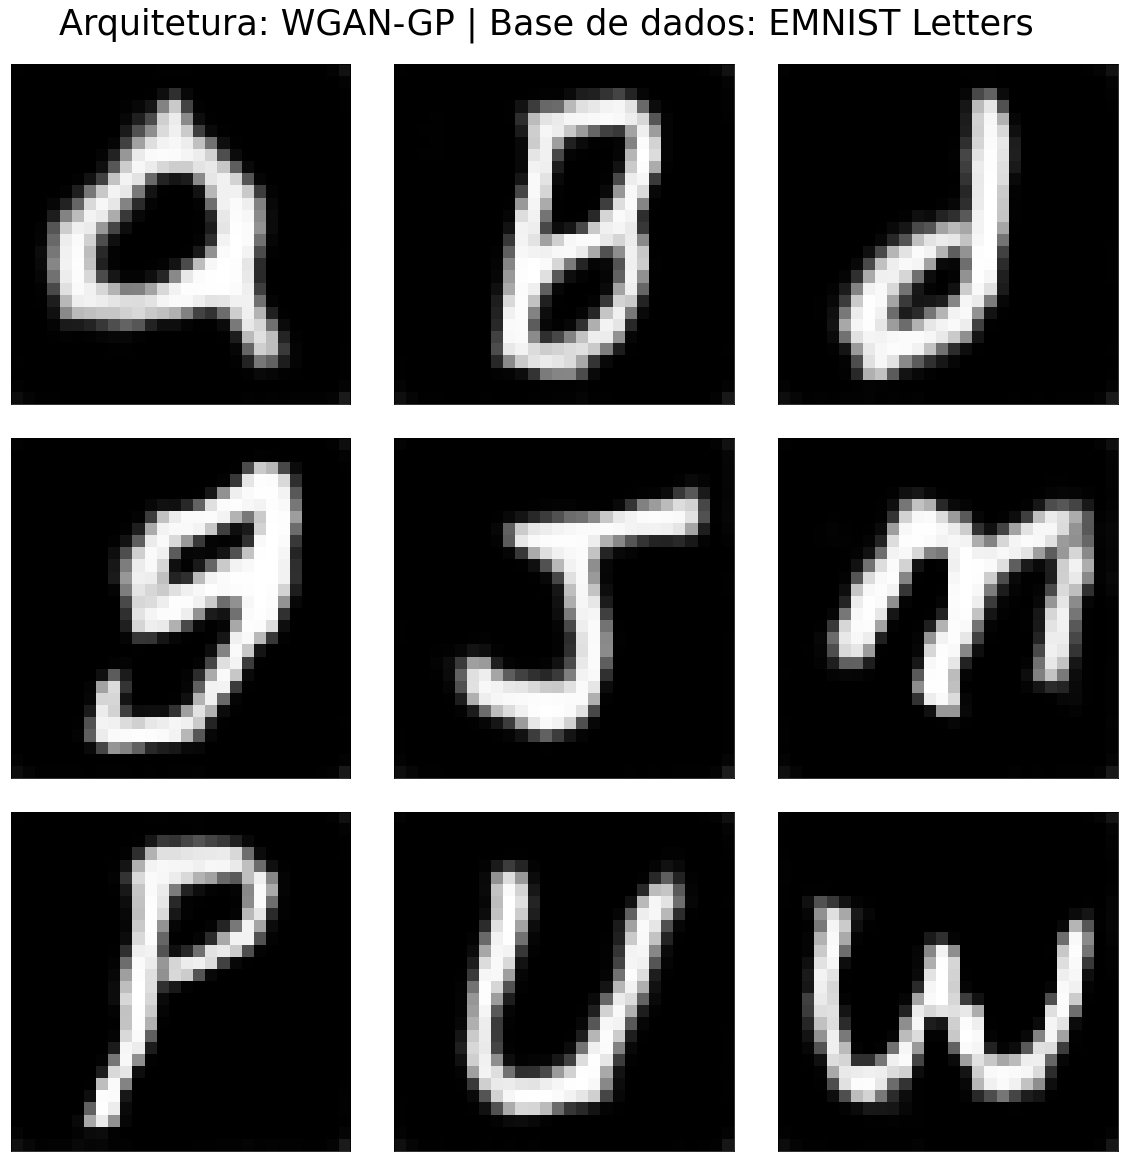

In [220]:
utils.grid_images(image_array = images_arrays_emnist_letters, cmap = 'gray', 
                  suptitle = 'Arquitetura: WGAN-GP | Base de dados: EMNIST Letters',
                  name_fig = 'wgan_gp_emnist_letters')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


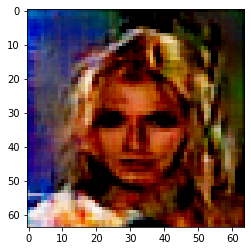

In [393]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([1]), celeba_classes).float()), 
                                         dim = 1)
fake = wgan_gp_celeba(noise_conditional)
fake = fake.detach().cpu().view(-1, *color_shape)
plt.imshow(fake[0].permute(1, 2, 0))
images_arrays_celeba[8] = fake[0].permute(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


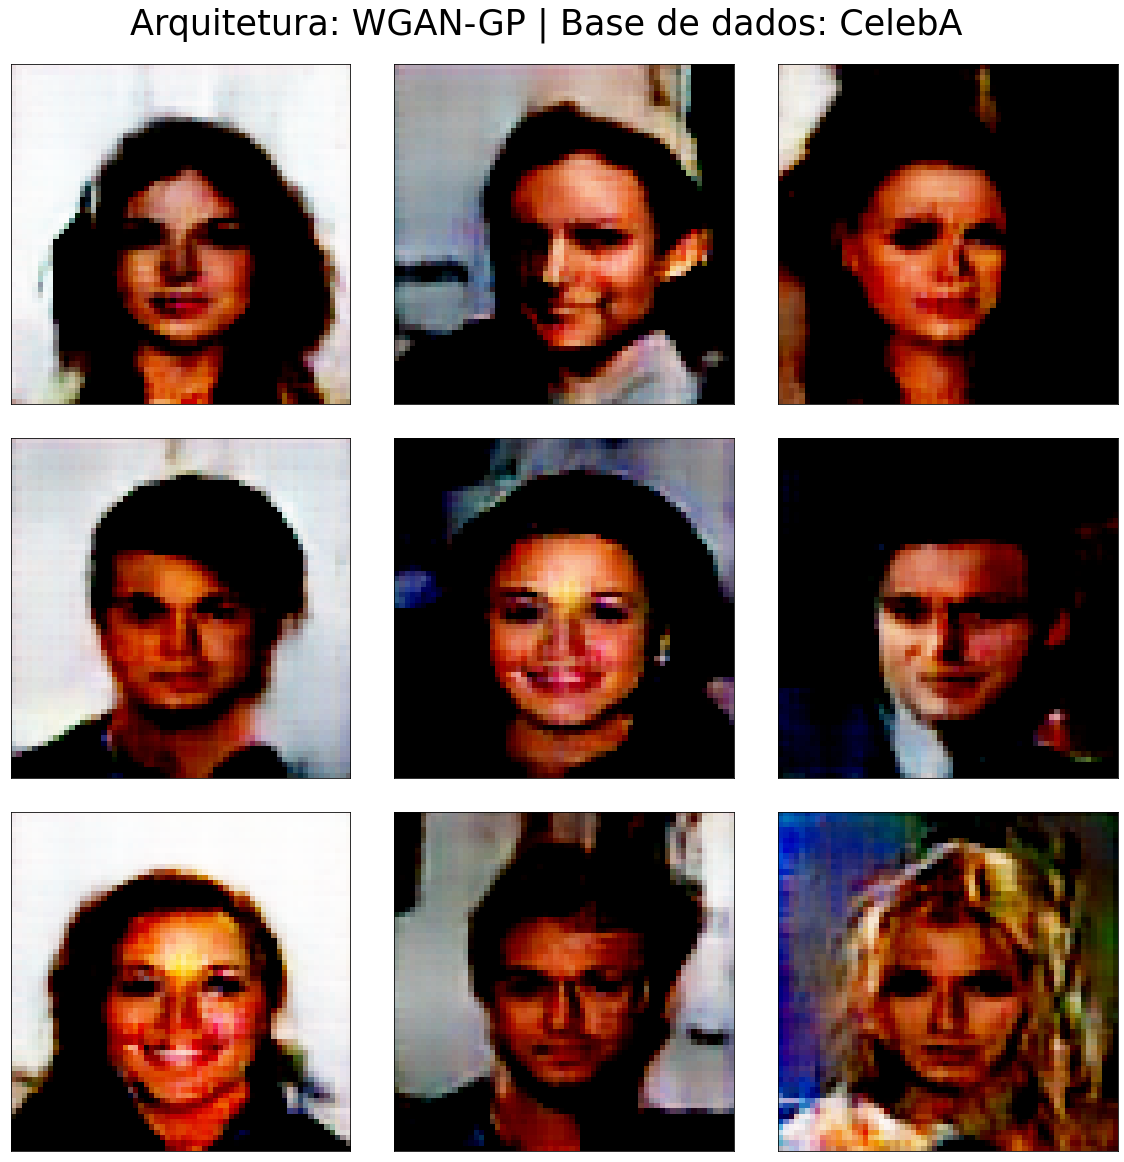

In [394]:
utils.grid_images(image_array = images_arrays_celeba, cmap = None, 
                  suptitle = 'Arquitetura: WGAN-GP | Base de dados: CelebA',
                  name_fig = 'wgan_gp_celeba')

### SNGAN + WGAN-GP

In [ ]:
generator_input_dim1 = utils.get_input_dimensions(z_dim, mnist_classes)
sngan_wgan_gp_mnist = generators.GeneratorSNGANWGANGP_V1_0(z_dim = generator_input_dim1)
generator_input_dim2 = utils.get_input_dimensions(z_dim, fashion_mnist_classes)
sngan_wgan_gp_fashion_mnist = generators.GeneratorSNGANWGANGP_V1_0(z_dim = generator_input_dim2)
generator_input_dim3 = utils.get_input_dimensions(z_dim, emnist_letters_classes)
sngan_wgan_gp_emnist_letters = generators.GeneratorSNGANWGANGP_V1_0(z_dim = generator_input_dim3)
generator_input_dim4 = utils.get_input_dimensions(z_dim, celeba_classes)
sngan_wgan_gp_celeba = generators.GeneratorSNGANWGANGP_V2_0(input_dim = generator_input_dim4)

model_path1 = '../implemented-gans-architectures/wgan-gp-sngan/mnist/saved-models/gen_conditional_wgan_gp_sngan_mnist.pth'
model_path2 = '../implemented-gans-architectures/wgan-gp-sngan/fashion-mnist/saved-models/gen_conditional_wgan_gp_sngan_fashion_mnist.pth'
model_path3 = '../implemented-gans-architectures/wgan-gp-sngan/emnist-letters/saved-models/gen_conditional_wgan_gp_sngan_emnist_letters.pth'
model_path4 = '../implemented-gans-architectures/wgan-gp-sngan/celeba/saved-models/gen_conditional_wgan_gp_sngan_celeba.pth'

sngan_wgan_gp_mnist.load_state_dict(torch.load(model_path1, map_location = torch.device(device)))
sngan_wgan_gp_mnist.eval()
sngan_wgan_gp_fashion_mnist.load_state_dict(torch.load(model_path2, map_location = torch.device(device)))
sngan_wgan_gp_fashion_mnist.eval()
sngan_wgan_gp_emnist_letters.load_state_dict(torch.load(model_path3, map_location = torch.device(device)))
sngan_wgan_gp_emnist_letters.eval()
sngan_wgan_gp_celeba.load_state_dict(torch.load(model_path4, map_location = torch.device(device)))
sngan_wgan_gp_celeba.eval()

In [4]:
images_arrays_mnist = np.zeros(shape = (9, 28, 28))
images_arrays_fashion_mnist = np.zeros(shape = (9, 28, 28))
images_arrays_emnist_letters = np.zeros(shape = (9, 28, 28))
images_arrays_celeba = np.zeros(shape = (9, 64, 64, 3))

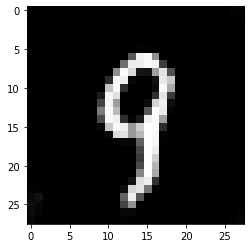

In [106]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([9]), mnist_classes).float()), 
                                         dim = 1)
fake = sngan_wgan_gp_mnist(noise_conditional)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_mnist[8] = fake[0, 0]

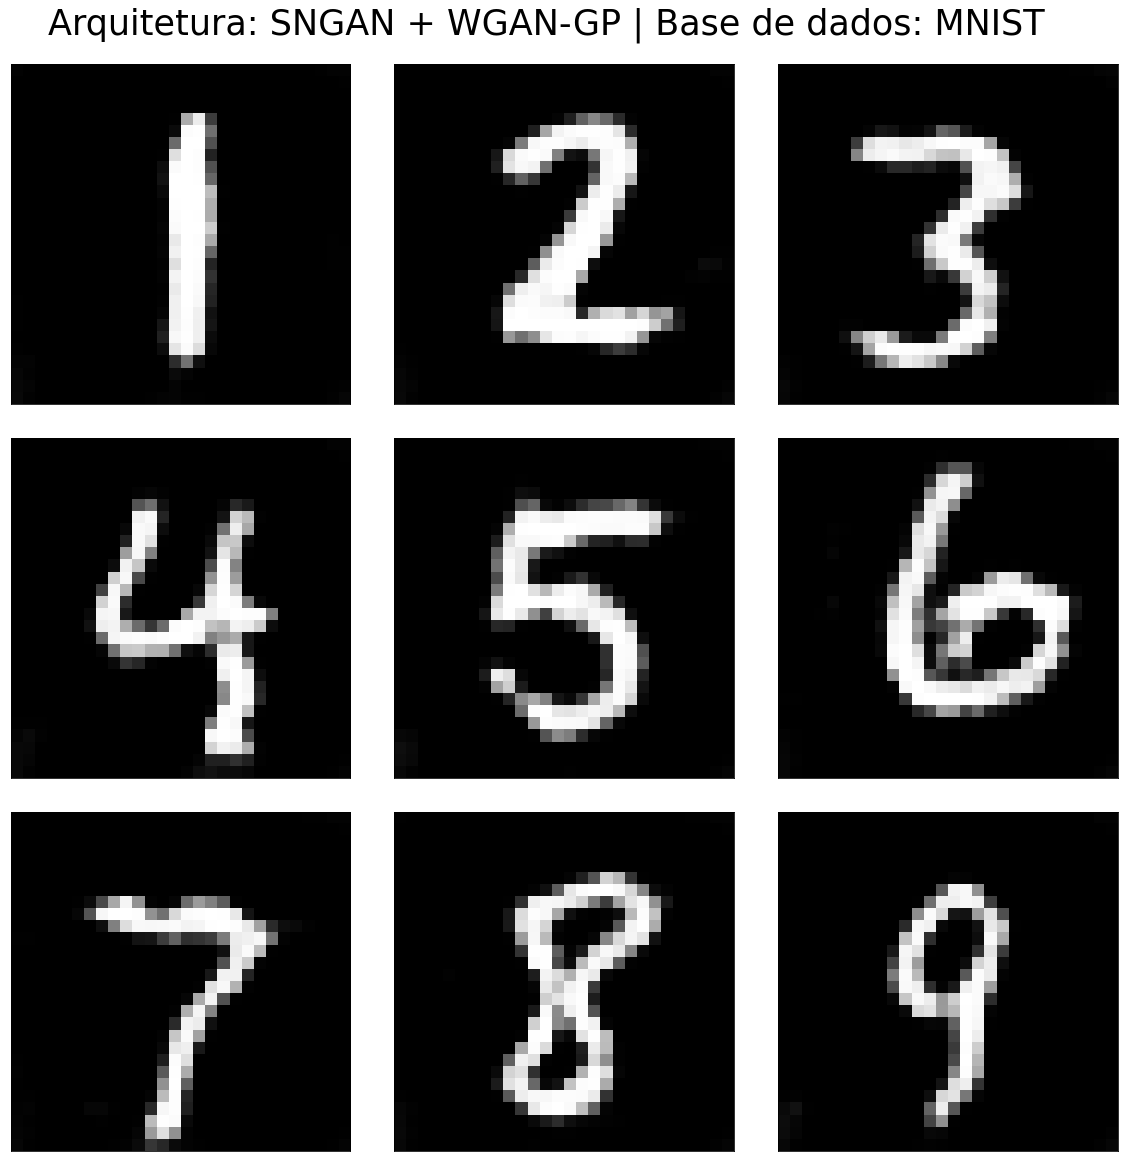

In [107]:
utils.grid_images(image_array = images_arrays_mnist, cmap = 'gray', 
                  suptitle = 'Arquitetura: SNGAN + WGAN-GP | Base de dados: MNIST',
                  name_fig = 'sngan_wgan_gp_mnist')

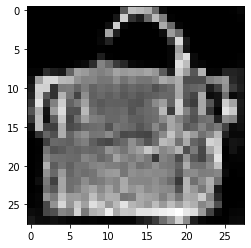

In [295]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([8]), fashion_mnist_classes).float()), 
                                         dim = 1)
fake = sngan_wgan_gp_fashion_mnist(noise_conditional)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_fashion_mnist[8] = fake[0, 0]

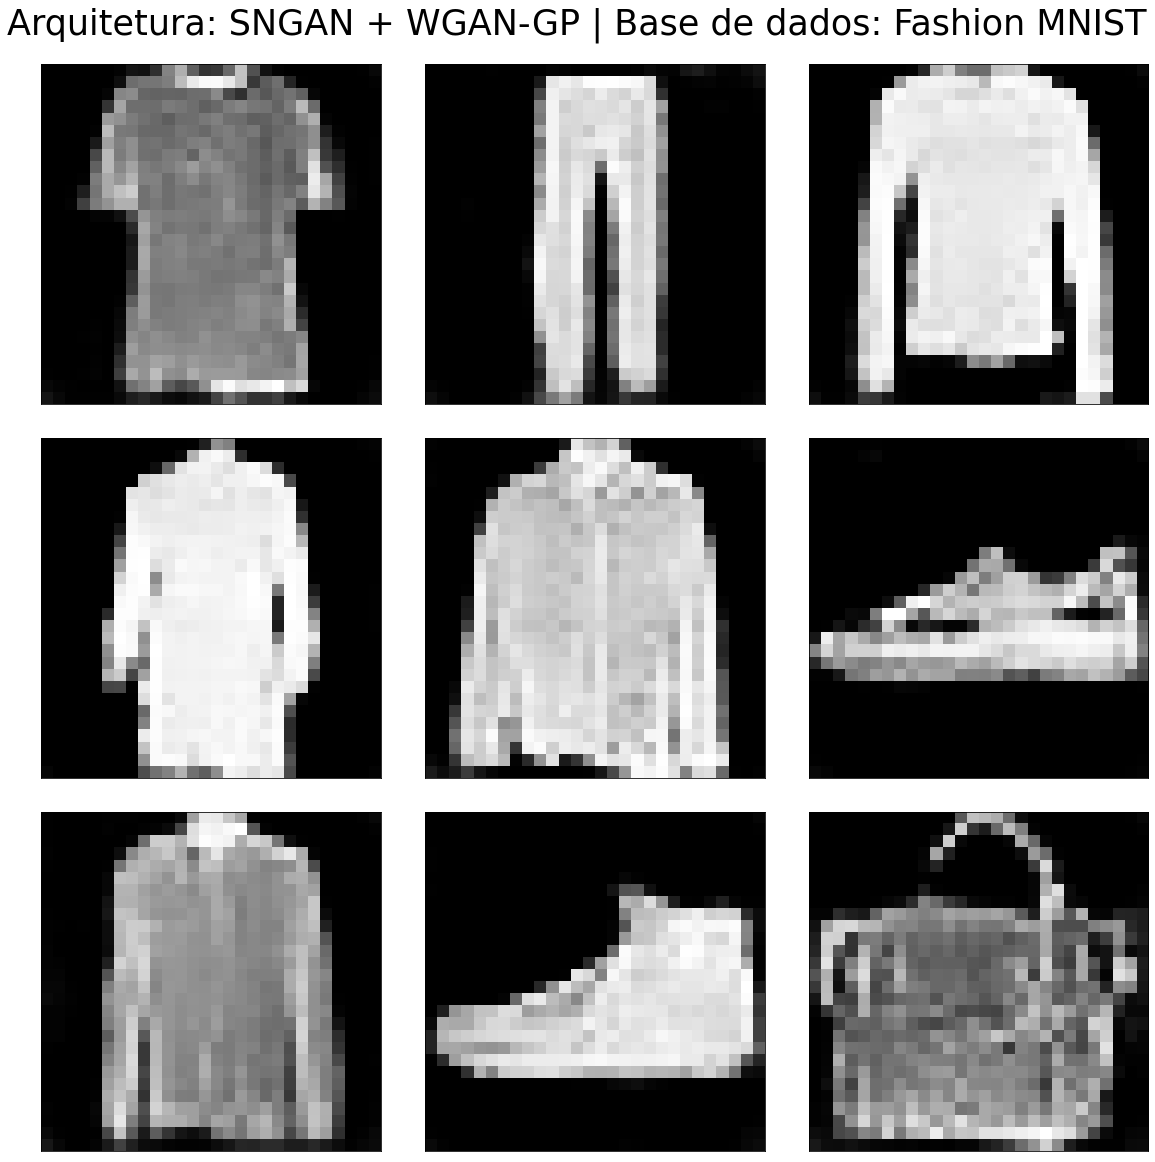

In [296]:
utils.grid_images(image_array = images_arrays_fashion_mnist, cmap = 'gray', 
                  suptitle = 'Arquitetura: SNGAN + WGAN-GP | Base de dados: Fashion MNIST',
                  name_fig = 'sngan_wgan_gp_fashion_mnist')

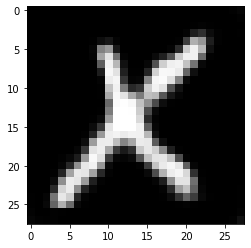

In [467]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([24]), emnist_letters_classes).float()), 
                                         dim = 1)
fake = sngan_wgan_gp_emnist_letters(noise_conditional)
fake = fake.detach().cpu().view(-1, *gray_shape)
plt.imshow(fake[0, 0], cmap = 'gray')
images_arrays_emnist_letters[8] = fake[0, 0]

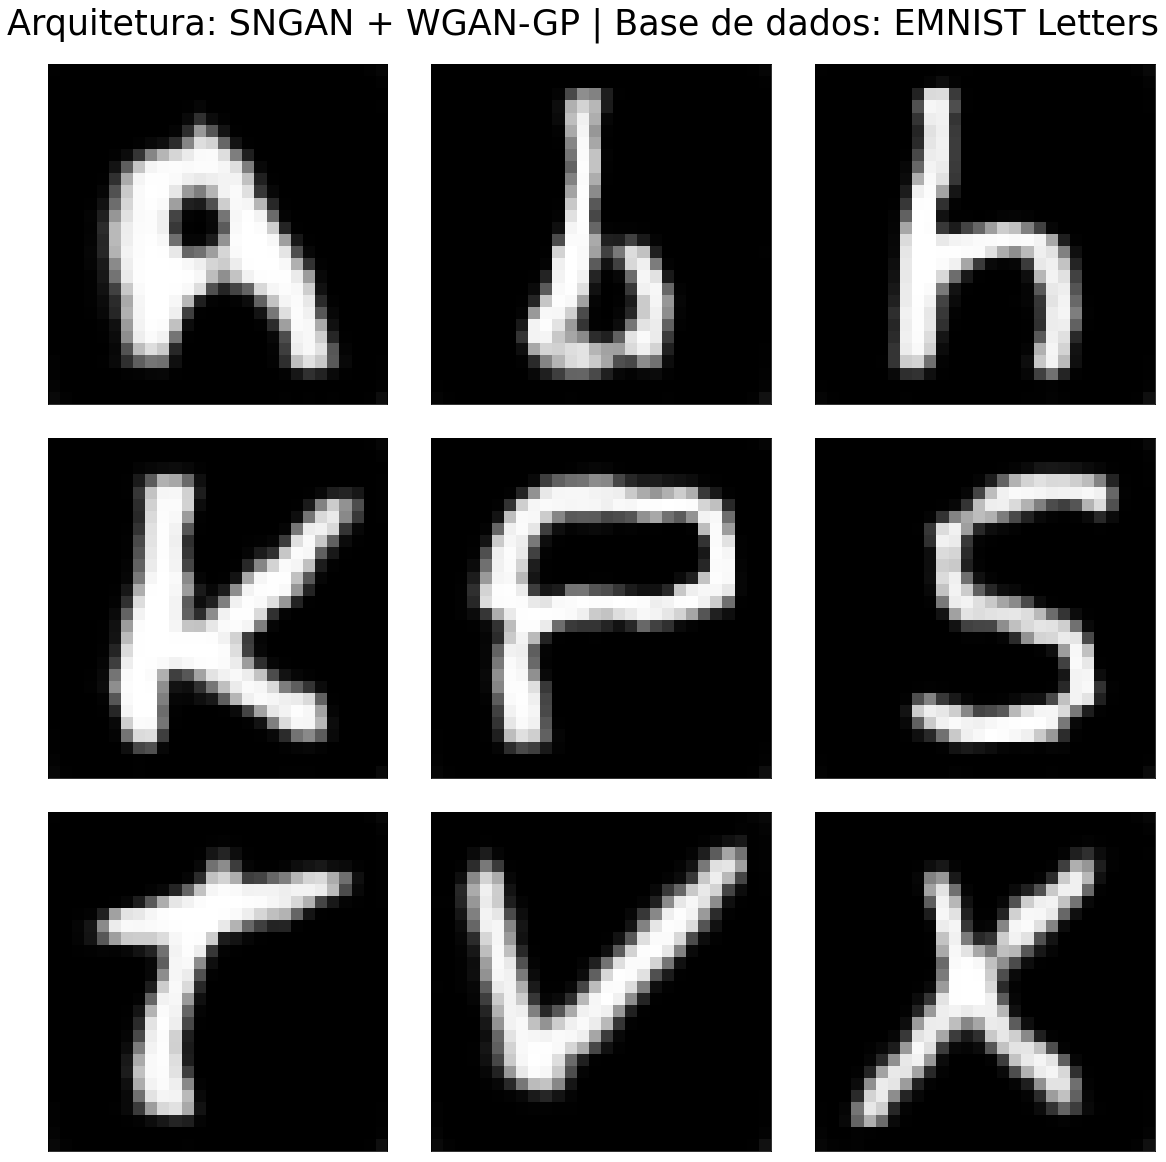

In [468]:
utils.grid_images(image_array = images_arrays_emnist_letters, cmap = 'gray', 
                  suptitle = 'Arquitetura: SNGAN + WGAN-GP | Base de dados: EMNIST Letters',
                  name_fig = 'sngan_wgan_gp_emnist_letters')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


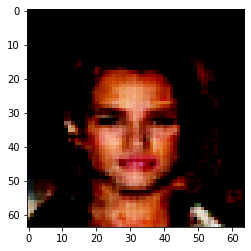

In [924]:
noise = utils.get_noise(n_samples = 1, input_dim = z_dim, device = device)
noise_conditional = torch.cat(tensors = (noise.float(), 
                                         F.one_hot(torch.tensor([1]), celeba_classes).float()), 
                                         dim = 1)
fake = sngan_wgan_gp_celeba(noise_conditional)
fake = fake.detach().cpu().view(-1, *color_shape)
plt.imshow(fake[0].permute(1, 2, 0))
images_arrays_celeba[8] = fake[0].permute(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


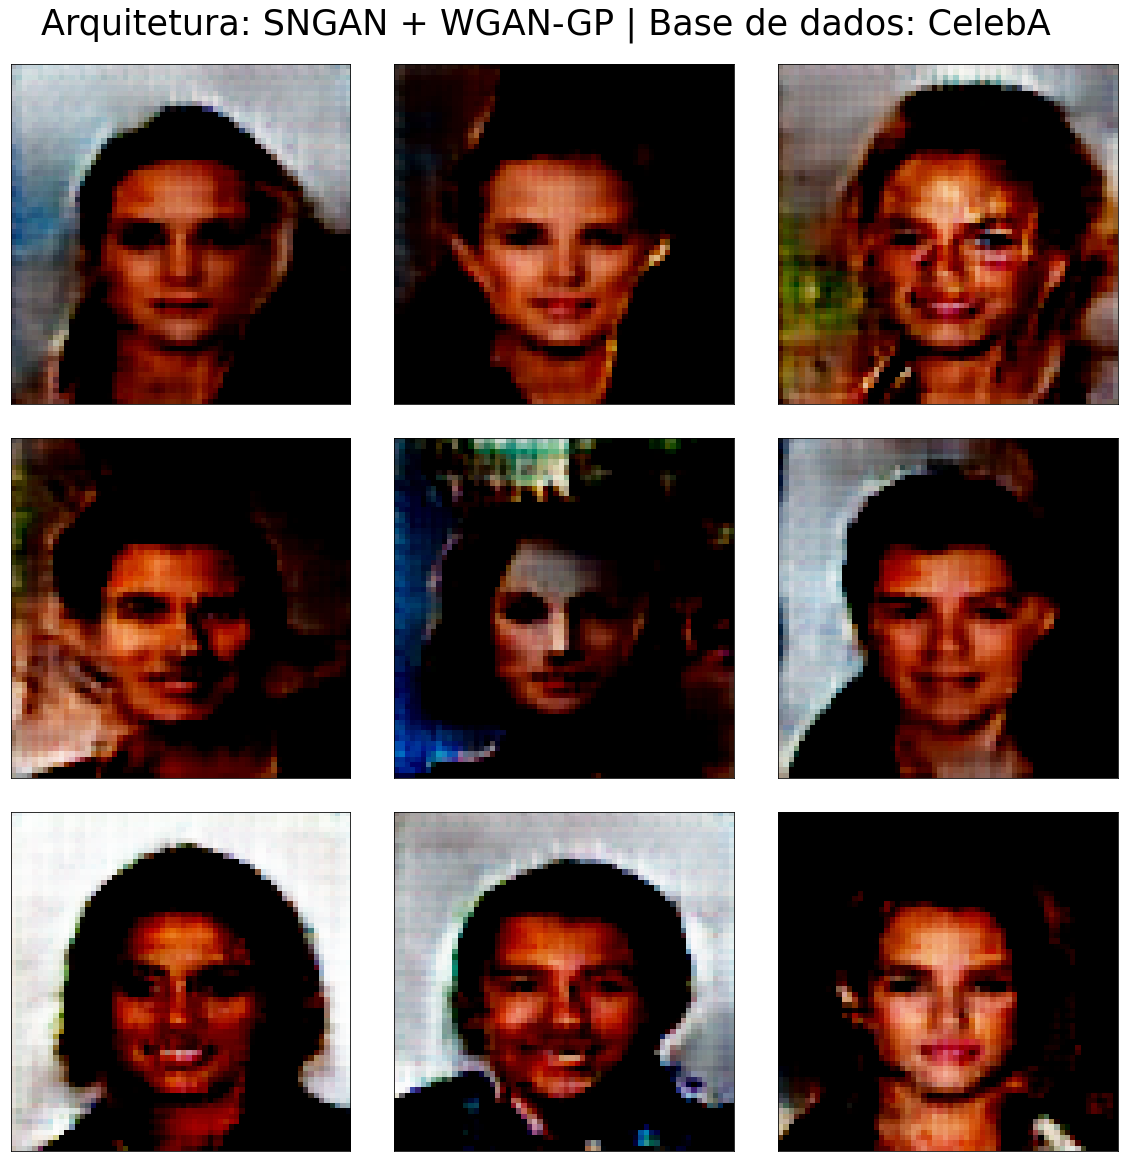

In [925]:
utils.grid_images(image_array = images_arrays_celeba, cmap = None, 
                  suptitle = 'Arquitetura: SNGAN + WGAN-GP | Base de dados: CelebA',
                  name_fig = 'sngan_wgan_gp_celeba')